In [93]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('0_Merged.csv')

In [3]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95"


# Eda Q1:
#### Berapa rata-rata umur customer jika dilihat dari marital statusnya ?

In [4]:
customer = pd.read_csv('Dataset/Case Study - Customer.csv', delimiter=";")

In [13]:
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [10]:
customer["Marital Status"].value_counts()

Married    340
Single     104
Name: Marital Status, dtype: int64

In [12]:
customer["Marital Status"].isna().sum()

3

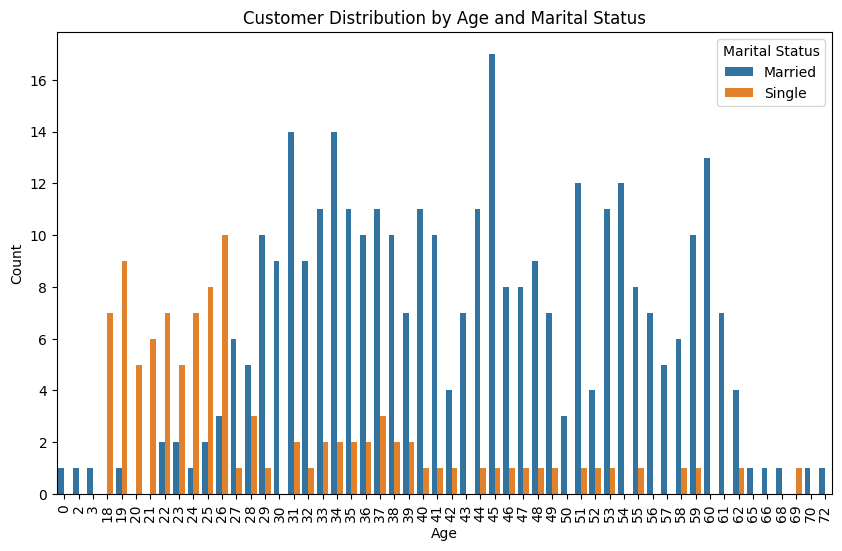

In [20]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot using Seaborn
sns.countplot(data=customer, x='Age', hue='Marital Status')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Age and Marital Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

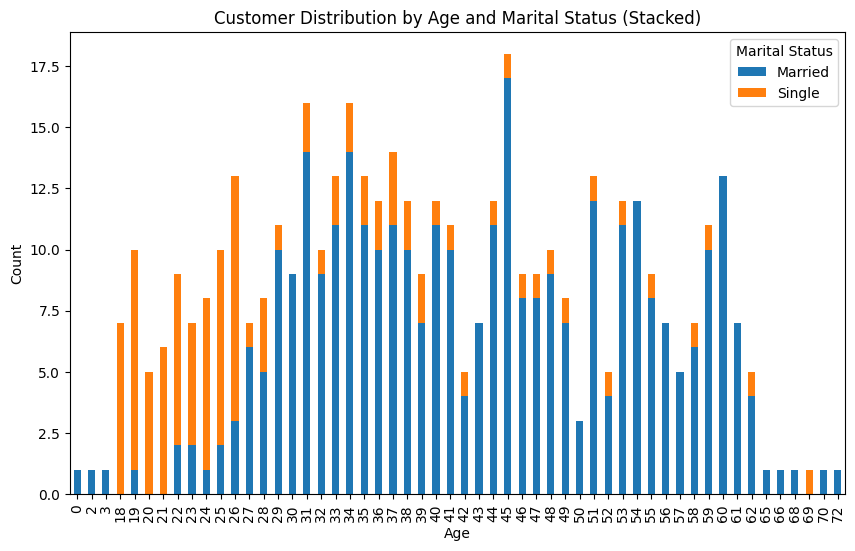

In [21]:
# Group the data by age and marital status and count the occurrences
grouped_data = customer.groupby(['Age', 'Marital Status']).size().unstack()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Age and Marital Status (Stacked)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

Hal menarik adalah ada umur 0-3 yang tercatat, dan mereka sudah menikah

In [30]:
# Umur rata rata yang sudah menikah
customer[customer["Marital Status"]=='Married']["Age"].mean()

43.03823529411765

In [32]:
# Umur rata rata yang belum menikah
customer[customer["Marital Status"]=='Single']["Age"].mean()

29.384615384615383

# EDA Q2:
#### Berapa rata-rata umur customer jika dilihat dari gender nya ?

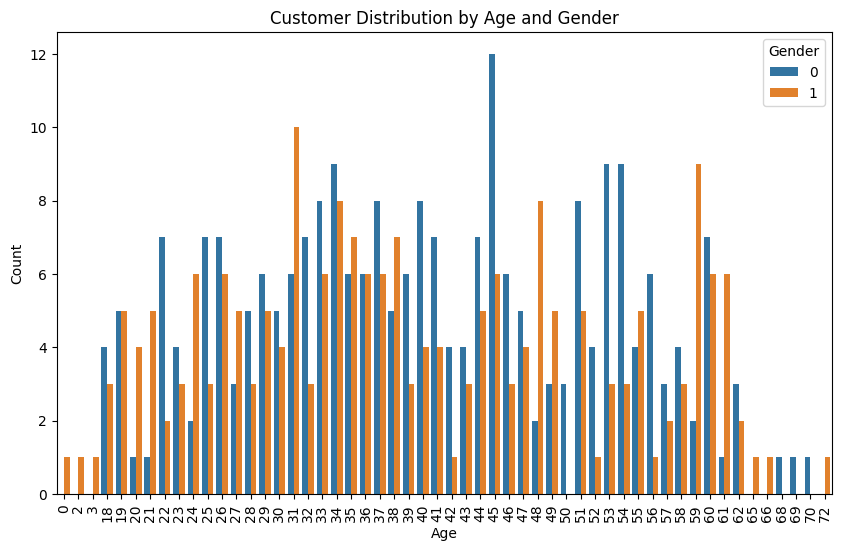

In [33]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the plot using Seaborn
sns.countplot(data=customer, x='Age', hue='Gender')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Age and Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

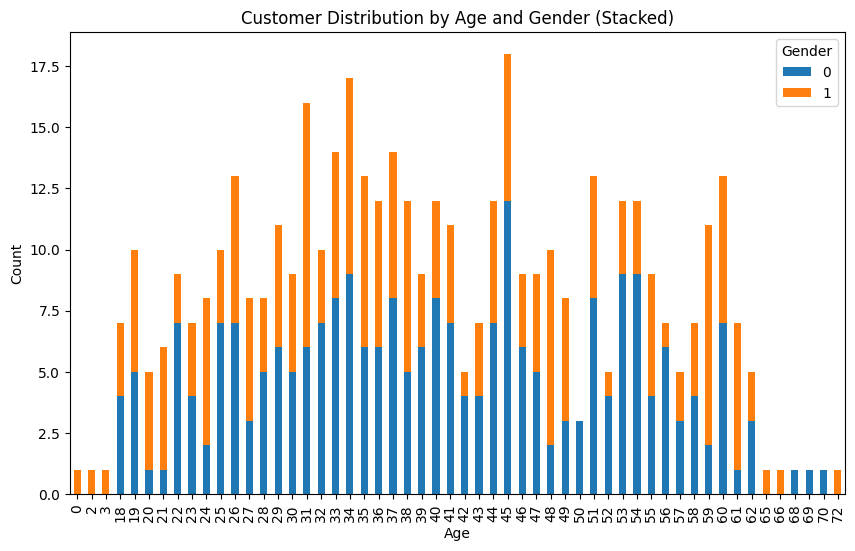

In [34]:
# Group the data by age and marital status and count the occurrences
grouped_data = customer.groupby(['Age', 'Gender']).size().unstack()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar plot
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Customer Distribution by Age and Gender (Stacked)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [41]:
# Umur rata rata yang gendernya wanita
customer[customer["Gender"]==0]["Age"].mean()

40.32644628099174

In [42]:
# Umur rata rata yang gendernya pria
customer[customer["Gender"]==1]["Age"].mean()

39.141463414634146

# EDA Q3
####  Tentukan nama store dengan total quantity terbanyak!

In [43]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95"


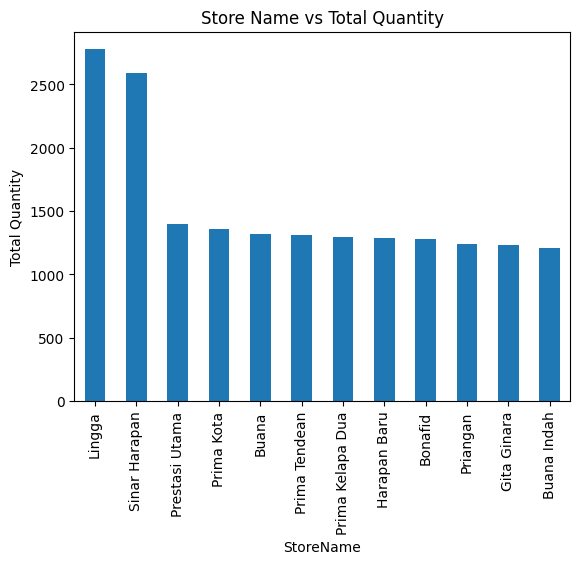

In [58]:
# Dapat dilihat dengan jelas Toko yang paling ramai adalah Lingga

plt.title("Store Name vs Total Quantity")
df.groupby("StoreName").sum()["Qty"].sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Total Quantity")
plt.show()

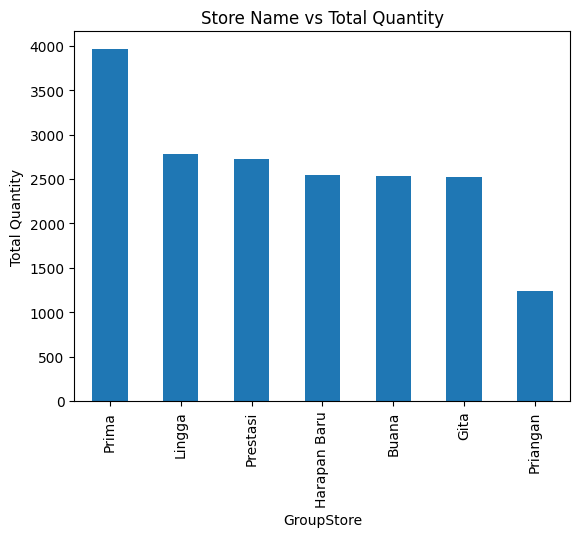

In [59]:
# Dapat dilihat dengan jelas Group Store yang paling ramai adalah Prima

plt.title("Store Name vs Total Quantity")
df.groupby("GroupStore").sum()["Qty"].sort_values(ascending=False).plot(kind='bar')
plt.ylabel("Total Quantity")
plt.show()

# EDA Q4
#### Tentukan nama produk terlaris dengan total amount terbanyak!

In [60]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Product Name,Age,Gender,Marital Status,Income
0,TR11369,328,01/01/2022,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",Crackers,36,0,Married,"10,53"
1,TR16356,165,01/01/2022,P9,10000,7,70000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",Yoghurt,44,1,Married,"14,58"
2,TR1984,183,01/01/2022,P1,8800,4,35200,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,27,1,Single,"0,18"
3,TR35256,160,01/01/2022,P1,8800,7,61600,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Choco Bar,48,1,Married,"12,57"
4,TR41231,386,01/01/2022,P9,10000,1,10000,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664",Yoghurt,33,0,Married,"6,95"


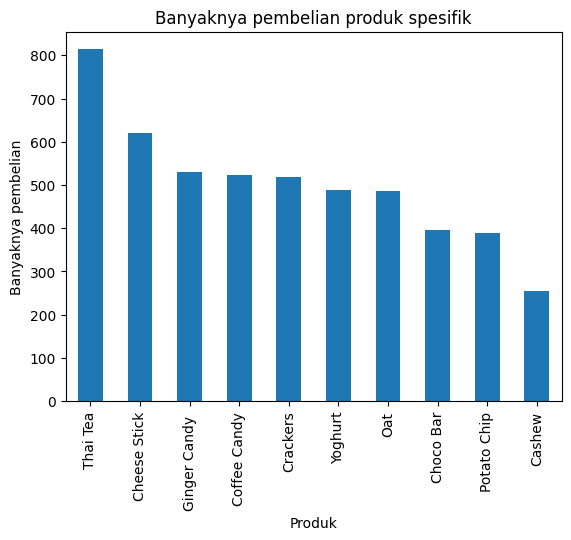

In [96]:
plt.title("Banyaknya pembelian produk spesifik")
plt.ylabel("Banyaknya pembelian")
plt.xlabel("Produk")
df["Product Name"].value_counts().plot(kind="bar")
# Calculate the value counts of each product
product_counts = df["Product Name"].value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

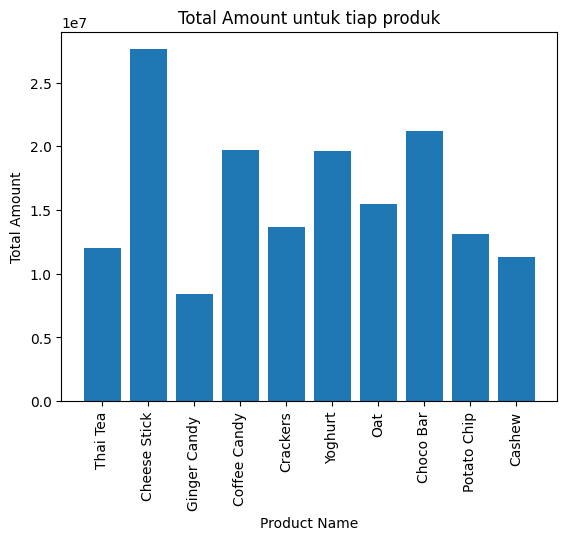

In [97]:
# Cheese stick banyak dibeli dan memiliki total amout yang banyak
product_counts = df["Product Name"].value_counts()
total_amounts = df.groupby('Product Name').sum()["TotalAmount"]
sorted_total_amounts = total_amounts.reindex(product_counts.index.tolist())

plt.bar(sorted_total_amounts.index, sorted_total_amounts)
plt.xlabel('Product Name')
plt.ylabel('Total Amount')
plt.title('Total Amount untuk tiap produk')
plt.xticks(rotation=90)